# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_HonkaiStarRail_1.csv")
df.head()

,userName,score,at,content
0,Farhan Hadi,5,2024-05-14 00:00:52,"I have a suggestion for Honkai Star Rail, when..."
1,Nightcore May_Can,5,2024-05-13 23:07:46,Permisi saya ada permasalahan setiap login ada...
2,Denni Putra Chaniago,5,2024-05-13 22:13:47,Mantap
3,siesta kawai,1,2024-05-13 20:49:35,kok aku merasa aku kayak dipermainkan katanya ...
4,Megumi Sayaka,5,2024-05-13 19:02:30,Bagus


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"I have a suggestion for Honkai Star Rail, when...",Farhan Hadi,2024-05-14 00:00:52
1,Permisi saya ada permasalahan setiap login ada...,Nightcore May_Can,2024-05-13 23:07:46
2,Mantap,Denni Putra Chaniago,2024-05-13 22:13:47
3,kok aku merasa aku kayak dipermainkan katanya ...,siesta kawai,2024-05-13 20:49:35
4,Bagus,Megumi Sayaka,2024-05-13 19:02:30
...,...,...,...
194,"Keren, dan mantap",radja marsellenosaputra,2024-05-09 07:46:47
195,Honkai : Star Rail Aplikasi Terbaik 💯,Ahmad Rifai,2024-05-09 07:38:56
196,Nice,Umar Sahaya,2024-05-09 07:38:16
197,"Story terbaru ok, tapi untuk farming material ...",Syarif Udin,2024-05-09 07:21:14


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,195,199,199
top,game baik,Farhan Hadi,2024-05-14 00:00:52
freq,3,1,1


# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(195, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,i have a suggestion for honkai star rail when ...,Farhan Hadi,2024-05-14 00:00:52
1,permisi saya ada permasalahan setiap login ada...,Nightcore May_Can,2024-05-13 23:07:46
2,mantap,Denni Putra Chaniago,2024-05-13 22:13:47
3,kok aku merasa aku kayak dipermainkan katanya ...,siesta kawai,2024-05-13 20:49:35
4,bagus,Megumi Sayaka,2024-05-13 19:02:30
...,...,...,...
194,keren dan mantap,radja marsellenosaputra,2024-05-09 07:46:47
195,honkai star rail aplikasi terbaik,Ahmad Rifai,2024-05-09 07:38:56
196,nice,Umar Sahaya,2024-05-09 07:38:16
197,story terbaru ok tapi untuk farming material d...,Syarif Udin,2024-05-09 07:21:14


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,i have a suggestion for honkai star rail when ...,Farhan Hadi,2024-05-14 00:00:52
1,permisi saya ada permasalahan setiap login ada...,Nightcore May_Can,2024-05-13 23:07:46
2,mantap,Denni Putra Chaniago,2024-05-13 22:13:47
3,kenapa aku merasa aku kayak dipermainkan katan...,siesta kawai,2024-05-13 20:49:35
4,bagus,Megumi Sayaka,2024-05-13 19:02:30
...,...,...,...
194,keren dan mantap,radja marsellenosaputra,2024-05-09 07:46:47
195,honkai star rail aplikasi terbaik,Ahmad Rifai,2024-05-09 07:38:56
196,nice,Umar Sahaya,2024-05-09 07:38:16
197,story terbaru ok tapi untuk farming material d...,Syarif Udin,2024-05-09 07:21:14


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,i have a suggestion for honkai star rail when ...,Farhan Hadi,2024-05-14 00:00:52
1,permisi permasalahan login ada tulisan terlalu...,Nightcore May_Can,2024-05-13 23:07:46
2,mantap,Denni Putra Chaniago,2024-05-13 22:13:47
3,aku merasa aku kayak dipermainkan katanya game...,siesta kawai,2024-05-13 20:49:35
4,bagus,Megumi Sayaka,2024-05-13 19:02:30
...,...,...,...
194,keren mantap,radja marsellenosaputra,2024-05-09 07:46:47
195,honkai star rail aplikasi terbaik,Ahmad Rifai,2024-05-09 07:38:56
196,nice,Umar Sahaya,2024-05-09 07:38:16
197,story terbaru tapi farming material konten wee...,Syarif Udin,2024-05-09 07:21:14


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [i, have, a, suggestion, for, honkai, star, ra...
1      [permisi, permasalahan, login, ada, tulisan, t...
2                                               [mantap]
3      [aku, merasa, aku, kayak, dipermainkan, katany...
4                                                [bagus]
                             ...                        
194                                      [keren, mantap]
195              [honkai, star, rail, aplikasi, terbaik]
196                                               [nice]
197    [story, terbaru, tapi, farming, material, kont...
198    [hey, hoyoverse, this, game, is, good, but, wh...
Name: content, Length: 195, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HonkaiStarRail_1.csv', index = False)


In [21]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HonkaiStarRail_1.csv', encoding = 'latin1')
df_clean

,content
0,i have a suggestion for honkai star rail when ...
1,permisi masalah login ada tulis terlalu banyak...
2,mantap
3,aku rasa aku kayak main kata game gacha bau mu...
4,bagus
...,...
190,keren mantap
191,honkai star rail aplikasi baik
192,nice
193,story baru tapi farming material konten weekly...


# **Translate**

In [22]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [23]:
import pandas as pd
from easynmt import EasyNMT

In [24]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_HonkaiStarRail_1.csv', encoding='latin1')

In [25]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 14.6MB/s]                   


In [27]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,i have a suggestion for honkai star rail when ...
1,permisi masalah login ada tulis terlalu banyak...
2,mantap
3,aku rasa aku kayak main kata game gacha bau mu...
4,bagus
...,...
190,keren mantap
191,honkai star rail aplikasi baik
192,nice
193,story baru tapi farming material konten weekly...


In [28]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HonkaiStarRail_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HonkaiStarRail_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...
1,1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...
2,2,mantap,Steady.
3,3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...
4,4,bagus,Good.
...,...,...,...
190,190,keren mantap,That's cool. That's cool.
191,191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app"
192,192,nice,Nice.
193,193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...


# **Labeling**

In [30]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_HonkaiStarRail_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...
1,1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...
2,2,mantap,Steady.
3,3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...
4,4,bagus,Good.
...,...,...,...
190,190,keren mantap,That's cool. That's cool.
191,191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app"
192,192,nice,Nice.
193,193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 112
Netral = 49
Negatif = 34

Total Data Seluruhnya : 195


In [34]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...,Negatif
1,1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...,Positif
2,2,mantap,Steady.,Positif
3,3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...,Negatif
4,4,bagus,Good.,Positif
...,...,...,...,...
190,190,keren mantap,That's cool. That's cool.,Positif
191,191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app",Positif
192,192,nice,Nice.,Positif
193,193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...,Positif


In [35]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...,Negatif
1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...,Positif
2,mantap,Steady.,Positif
3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...,Negatif
4,bagus,Good.,Positif
...,...,...,...
190,keren mantap,That's cool. That's cool.,Positif
191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app",Positif
192,nice,Nice.,Positif
193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...,Positif


# **Visualisasi**


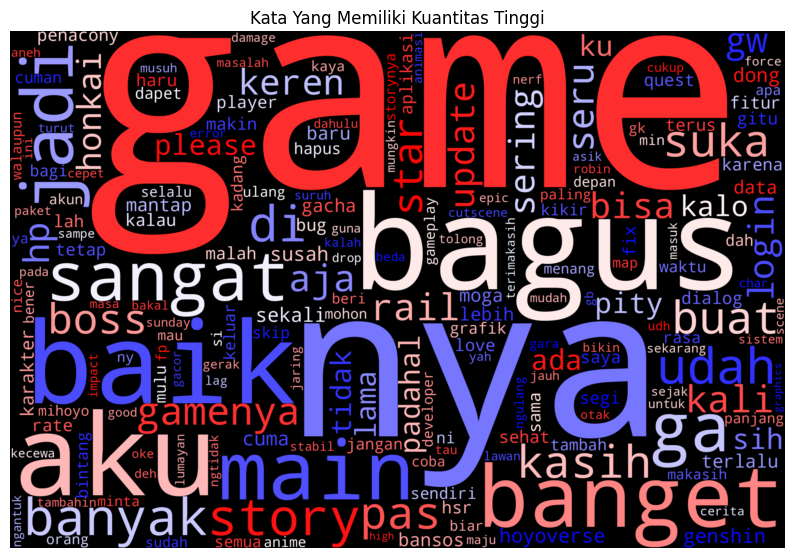

In [36]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


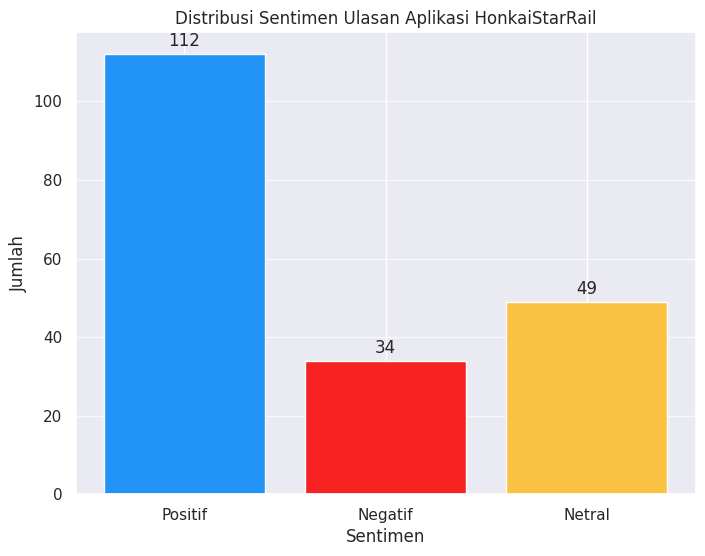

In [37]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HonkaiStarRail")


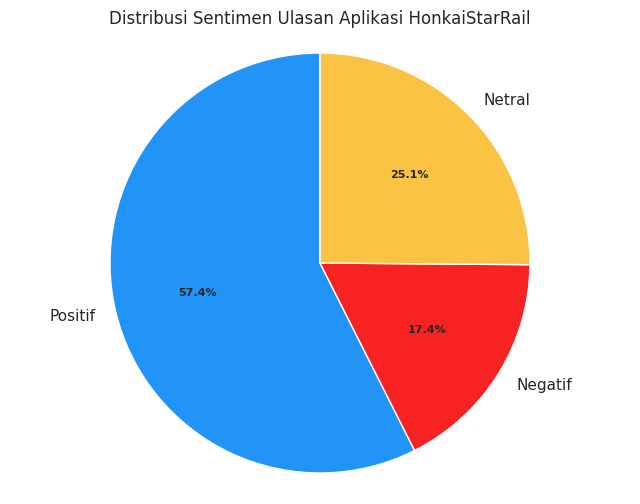

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HonkaiStarRail")

In [39]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...,Negatif
1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...,Positif
2,mantap,Steady.,Positif
3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...,Negatif
4,bagus,Good.,Positif
...,...,...,...
190,keren mantap,That's cool. That's cool.,Positif
191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app",Positif
192,nice,Nice.,Positif
193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...,Positif


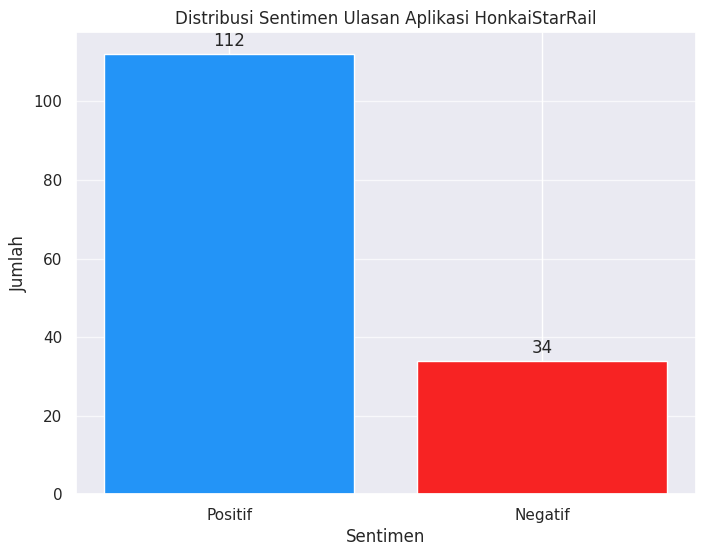

In [40]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HonkaiStarRail")


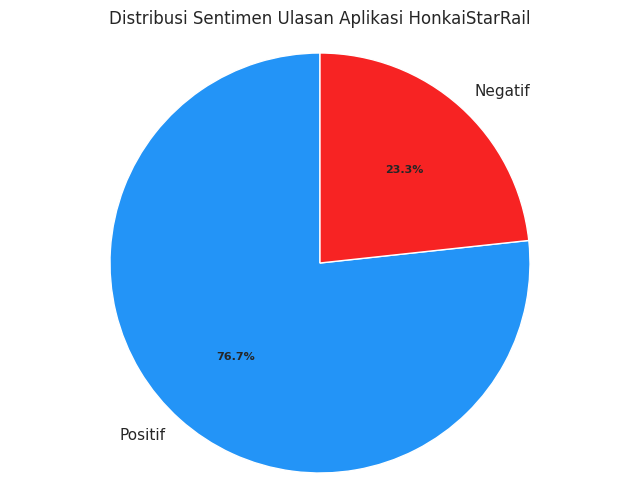

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi HonkaiStarRail")

In [42]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,i have a suggestion for honkai star rail when ...,I have a suggestion for honki star rail when t...,0
1,permisi masalah login ada tulis terlalu banyak...,Excuse me. The login problem. There's written ...,1
2,mantap,Steady.,1
3,aku rasa aku kayak main kata game gacha bau mu...,I think I'm playing a game. Gacha smells like ...,0
4,bagus,Good.,1
...,...,...,...
190,keren mantap,That's cool. That's cool.,1
191,honkai star rail aplikasi baik,"fontcolor="" # FFFF00""honkaistarrail good app",1
192,nice,Nice.,1
193,story baru tapi farming material konten weekly...,New story but farming content material weekly ...,1


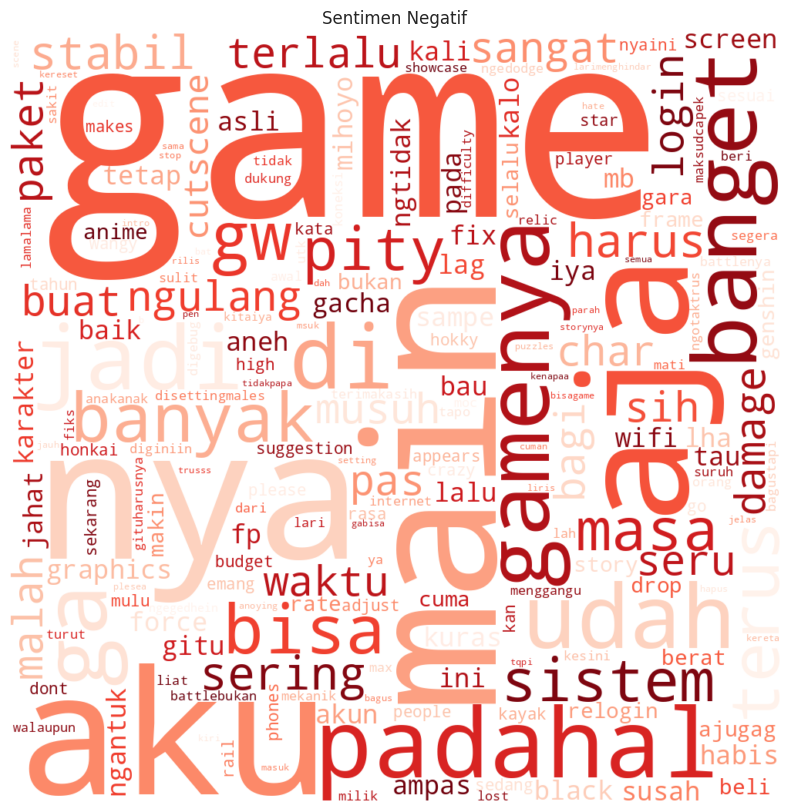

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

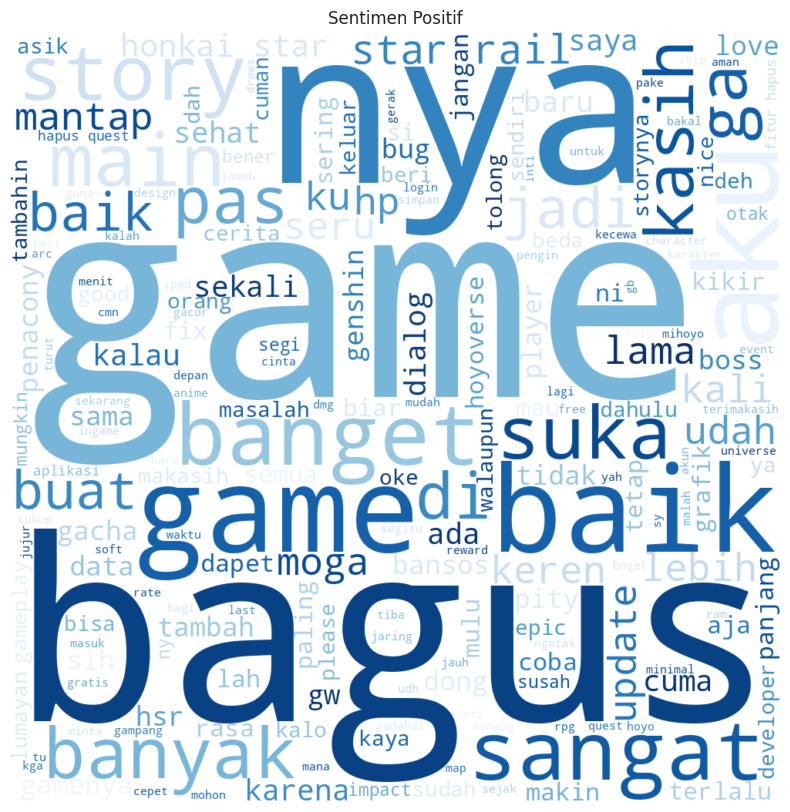

In [44]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
1    112
0     34
Name: count, dtype: int64

# **Data Preparation**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

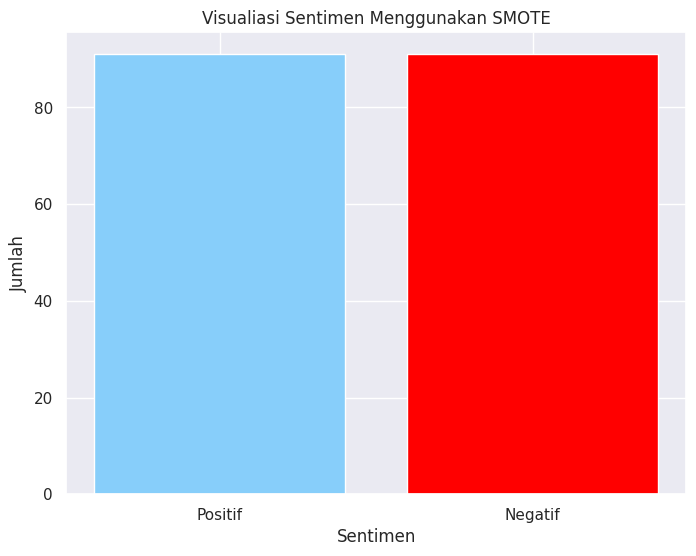

In [50]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

In [53]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7333333333333333

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.57      0.44      0.50         9
     Positif       0.78      0.86      0.82        21

    accuracy                           0.73        30
   macro avg       0.68      0.65      0.66        30
weighted avg       0.72      0.73      0.72        30



In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 4  5]
 [ 3 18]]

Accuracy =  0.7333333333333333


In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 4  5]
 [ 3 18]]

True Positives (TP) =  4

True Negatives (TN) =  18

False Positives (FP) =  5

False Negatives (FN) =  3

Accuracy =  0.7333333333333333


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

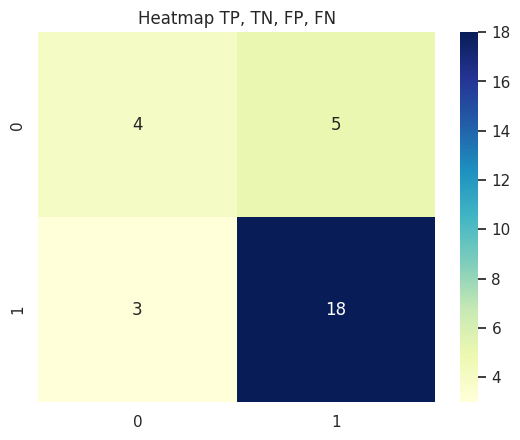

In [56]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [57]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [58]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7333


In [59]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2667


# **Testing**


In [60]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus, mudah dapetin characternya
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : game ampas
Hasil Analisis Sentimen Untuk Teks Baru : Negatif
